In [12]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns
import matplotlib.patches as mpatches

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_to_load_df = pd.read_csv(city_data_to_load)
ride_data_to_load_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combined_data_df = pd.merge(ride_data_to_load_df,city_data_to_load_df, on = "city")
# Display the data table for preview
combined_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

In [4]:
# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure


In [13]:
average_fare = combined_data_df.groupby("city")["fare"].mean()
average_fare.head()

city
Amandaburgh      24.641667
Barajasview      25.332273
Barronchester    36.422500
Bethanyland      32.956111
Bradshawfurt     40.064000
Name: fare, dtype: float64

In [14]:
total_rides = combined_data_df.groupby("city")["ride_id"].count()
total_rides.head()

city
Amandaburgh      18
Barajasview      22
Barronchester    16
Bethanyland      18
Bradshawfurt     10
Name: ride_id, dtype: int64

In [15]:
total_drivers = combined_data_df.groupby("city")["driver_count"].mean()
total_drivers.head()

city
Amandaburgh      12
Barajasview      26
Barronchester    11
Bethanyland      22
Bradshawfurt      7
Name: driver_count, dtype: int64

In [20]:
city_type = combined_data_df.drop_duplicates(subset="city", keep="first").set_index("city")["type"]
city_type.head()

city
Lake Jonathanshire    Urban
South Michelleport    Urban
Port Samanthamouth    Urban
Rodneyfort            Urban
South Jack            Urban
Name: type, dtype: object

In [21]:
ride_share_df =pd.DataFrame({"Average fare per city":average_fare,
                            "Numbers of Rides":total_rides,
                            "Numbers of Drivers":total_drivers,
                            "City Type":city_type})
ride_share_df.head()

,Average fare per city,Numbers of Rides,Numbers of Drivers,City Type
Amandaburgh,24.641667,18,12,Urban
Barajasview,25.332273,22,26,Urban
Barronchester,36.422500,16,11,Suburban
Bethanyland,32.956111,18,22,Suburban
Bradshawfurt,40.064000,10,7,Rural


In [22]:
ride_share_df = ride_share_df.reset_index()
ride_share_df.head()

,index,Average fare per city,Numbers of Rides,Numbers of Drivers,City Type
0,Amandaburgh,24.641667,18,12,Urban
1,Barajasview,25.332273,22,26,Urban
2,Barronchester,36.422500,16,11,Suburban
3,Bethanyland,32.956111,18,22,Suburban
4,Bradshawfurt,40.064000,10,7,Rural


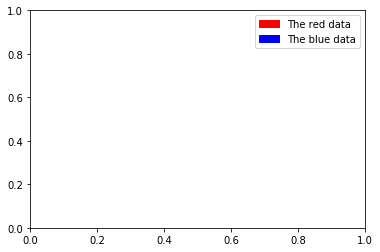

In [23]:
red_patch = mpatches.Patch(color='red', label='The red data')
blue_patch = mpatches.Patch(color='blue', label='The blue data')
plt.legend(handles=[red_patch, blue_patch])

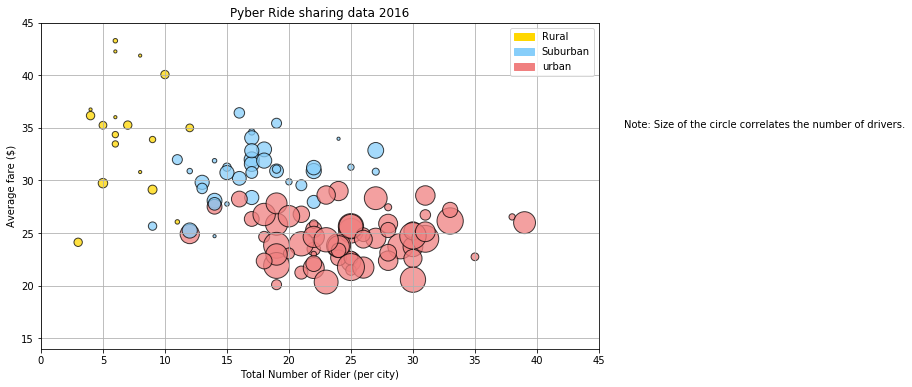

In [25]:
x = ride_share_df["Numbers of Rides"]
y = ride_share_df["Average fare per city"]
s = ride_share_df["Numbers of Drivers"]
lst= ride_share_df["City Type"]


plt.figure(figsize=(10,6))

def pltcolors(lst):
    cols=[]
    for l in lst:
        if l == "Rural":
            cols.append("gold")
        elif l == "Suburban":
            cols.append("lightskyblue")
        else:
            cols.append("lightcoral")
    return cols

cols = pltcolors(lst)

plt.scatter(x=x, y=y,s= 10* total_drivers, c=cols, edgecolors = "black", alpha =0.75)
plt.grid(axis="both")
gold_patch = mpatches.Patch(color="gold",label="Rural")
lightskyblue_patch = mpatches.Patch(color="lightskyblue",label="Suburban")
lightcoral_patch = mpatches.Patch(color="lightcoral",label="urban")

plt.legend(handles=[gold_patch,lightskyblue_patch,lightcoral_patch])

plt.text(47,35,s="Note: Size of the circle correlates the number of drivers.")
plt.xlim(0,45,0)
plt.ylim(14,45,0)
plt.title("Pyber Ride sharing data 2016")
plt.xlabel("Total Number of Rider (per city)")
plt.ylabel("Average fare ($)")

plt.savefig("Pyberridesharingdata.png")

plt.show()

## Total Fares by City Type

In [26]:
total_fare_by_type = combined_data_df.groupby("type")["fare"].sum()
total_fare_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [27]:
labels = ["Rural","Suburban","Urban"]

In [28]:
fares = [4327,19356,39854]

In [29]:
colors = ["Gold","lightskyblue","lightcoral"]

In [30]:
explode = (0, 0.1, 0)

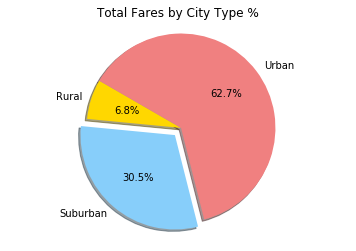

In [31]:
plt.pie(fares,explode=explode,labels=labels,colors=colors,autopct="%1.1F%%",shadow=True,startangle=150)
plt.title("Total Fares by City Type %")
plt.axis("equal")
plt.savefig("total_fares_city_type.png")
plt.show()

## Total Rides by City Type

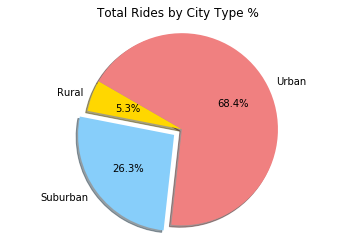

In [32]:

# Save Figure# Calculate Ride Percents
total_rides_by_type = combined_data_df.groupby("type")["ride_id"].count()
total_rides_by_type
# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
rides = [125,625,1625]
colors = ["Gold","lightskyblue","lightcoral"]
explode = (0, 0.1, 0)
plt.pie(rides,explode=explode,labels=labels,colors=colors,autopct="%1.1F%%",shadow=True,startangle=150)
plt.title("Total Rides by City Type %")
plt.axis("equal")
plt.savefig("total_ride_city_type.png")
plt.show()


## Total Drivers by City Type

In [33]:
# Calculate Driver Percents
total_drivers_by_type = combined_data_df.groupby("type")["driver_count"].sum()
total_drivers_by_type
# Build Pie Charts

# Save Figure


type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64

(-1.193977757128902,
 1.1104950571687422,
 -1.105398948454374,
 1.1068290348518348)

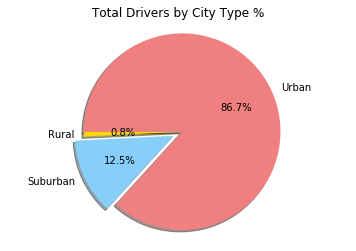

In [34]:

# Save Figure# Calculate Ride Percents
total_drivers_by_type = combined_data_df.groupby("type")["driver_count"].sum()
total_drivers_by_type
# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
rides = [537,8570,59602]
colors = ["Gold","lightskyblue","lightcoral"]
explode = (0, 0.1, 0)
plt.pie(rides,explode=explode,labels=labels,colors=colors,autopct="%1.1F%%",shadow=True,startangle=180)

plt.title("Total Drivers by City Type %")
plt.savefig("total_drivers_city_type.png")
plt.axis("equal")



## Observations

In [35]:
#Observation 1:
# The Total no of ridres were more in urban areas compared to rural and suburban.

#Observation 2:
# The Total average fares were more in rural areas.

#Observation 3:
# Overall no of drivers/city are more in urban cities.